# Logistic Regression for the Iris Dataset
We will attempt to classify Iris flowers, which come in three types, _viz._ setosa, versicolour and virginica. We will use the petal length and width as predictors of flower type. In particular we will solve the binary classification problem of Virginica vs Setosa or Versicolour. The goal of the notebook is to train a Logistic Regression classifier, analyze its performance on test data, and visualize its decision boundaries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib as mpl

In [ ]:
iris = datasets.load_iris()
print(list(iris.keys()))

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [ ]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
print('feature names: ', iris['feature_names']) 
print('target names: ', iris['target_names'])
print('target labels: ',np.unique(iris['target']))

feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names:  ['setosa' 'versicolor' 'virginica']
target labels:  [0 1 2]


In [ ]:
X_p = iris['data'][:,2:] # 3: yields an (m,1) array instead of (m,)
y_p = iris['target'] # 1 for virginica 0 for others

X_train, _, y_train, _ = train_test_split(X_p,y_p,test_size=0.3)

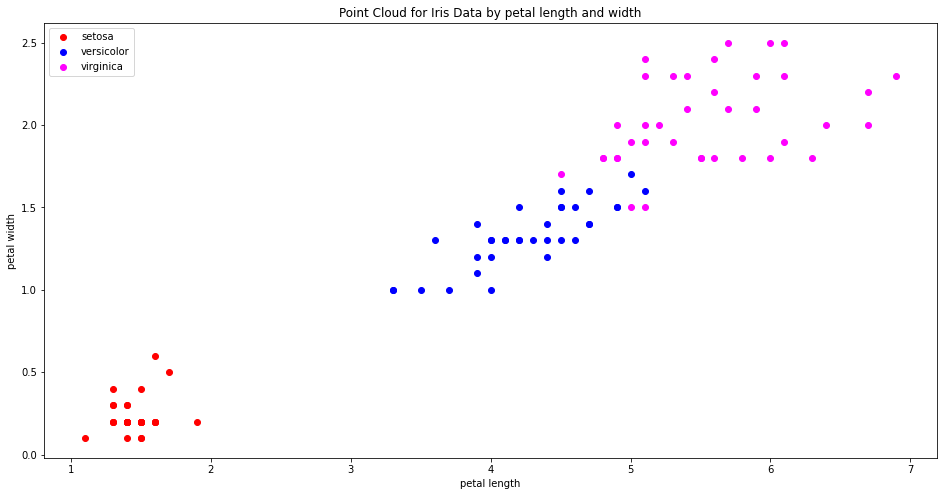

In [ ]:
plt.figure(figsize=(16,8))
color = ['red','blue','magenta']
species = ['setosa','versicolor','virginica']
for iris in range(3):
    mask = y_train == iris
    plt.scatter(X_train[mask,0],X_train[mask,1],c=color[iris],label=species[iris])
plt.title('Point Cloud for Iris Data by petal length and width')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='best')
plt.show()

# Load and process data for training and testing

We predict the class probabilities for a given iris flower to be 'virginica' or 'not virginica' depending on the petal width. 

In [ ]:
iris = datasets.load_iris()
X = iris['data'][:,3:] # 3: yields an (m,1) array instead of (m,)
y = (iris['target']==2).astype(int) # 1 for virginica 0 for others

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape, X_test.shape)

(105, 1) (45, 1)


# Train and Evaluate model

We will use <tt>sklearn</tt>'s <tt>LogisticRegression</tt> classifier, documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_train)
print('accuracy reached on train set: ',accuracy_score(y_train,y_pred))

cvscore = cross_val_score(log_reg,X_train,y_train,cv=3, scoring='accuracy')

print('accuracies obtained on 3-fold cross validation: ', cvscore)

y_pred = log_reg.predict(X_test)
print('accuracy reached on test set: ',accuracy_score(y_test,y_pred))

accuracy reached on train set:  0.9523809523809523
accuracies obtained on 3-fold cross validation:  [0.91428571 0.94285714 0.97142857]
accuracy reached on test set:  0.9777777777777777


# Visualize Decision Boundary

We can visualize how the probability of the model predicting 0 or 1 (not virginica or virginica) changes as we vary the petal length from 0.1 to 2.5
(the minimum and maximum values allowed in the dataset).

In [ ]:
petal_width = np.linspace(0,3,1000).reshape(-1,1)

probas = log_reg.predict_proba(petal_width)

p_not_irv = probas[:,0]
p_irv = probas[:,1]

## code to generate plot

In [ ]:
# locate decision boundary (by default, p = 0.5)

bdry_idx = np.argmin(np.abs(p_irv-0.5)) #where is p_irv closest to 0.5
dec_bdry = petal_width[bdry_idx]

In [ ]:
# process test data for visualization as scatter points
plotx = X_test[:,0]
ploty = np.zeros(plotx.shape)
colors = np.array(['r' if y==0 else 'b' for y in y_test])
# diamonds for those predicted virginica, squares otherwise
markers = np.array(['s' if y<0.5 else '+' for y in y_pred])

unique_markers = np.unique(markers).astype('U')

## plot results and decision boundary

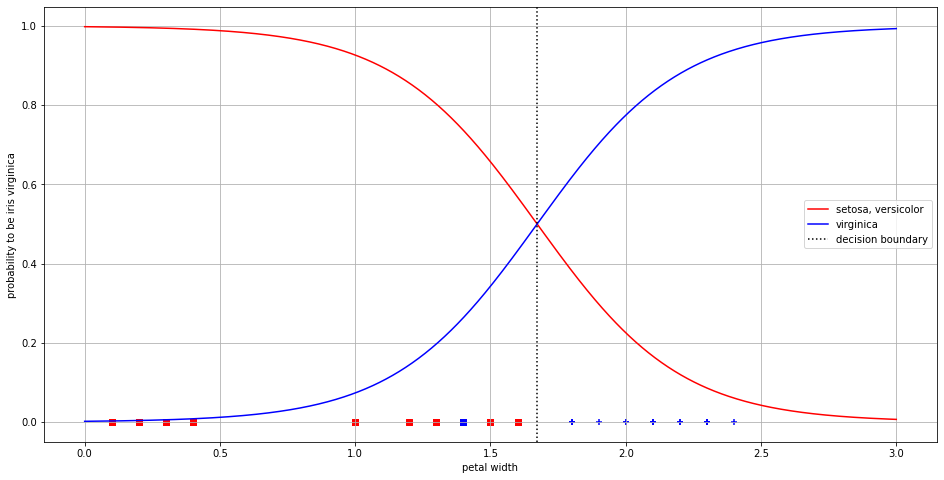

red squares and blue plus are correct classifications
red plus and blue squares are incorrect


In [ ]:
plt.figure(figsize=(16,8))
plt.plot(petal_width,p_not_irv,color='red',label='setosa, versicolor')
plt.plot(petal_width,p_irv,color='blue',label='virginica')
plt.axvline(x = dec_bdry, color = 'k',linestyle=':',label ='decision boundary')
for m in unique_markers: #markers cannot be a list so we plot case by case
  mask = markers == m
  plt.scatter(plotx[mask],ploty[mask],c=colors[mask],marker=m)
plt.legend(loc='best')
plt.xlabel('petal width')
plt.ylabel('probability to be iris virginica')
plt.grid('both')
plt.show()
print('red squares and blue plus are correct classifications')
print('red plus and blue squares are incorrect')

# Logistic Regression using petal width and petal length

In [ ]:
X = iris['data'][:,2:] # 3: yields an (m,1) array instead of (m,)
y = (iris['target']==2).astype(int) # 1 for virginica 0 for others

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape, X_test.shape)

(105, 2) (45, 2)


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_train)
print('accuracy reached on train set: ',accuracy_score(y_train,y_pred))

cvscore = cross_val_score(log_reg,X_train,y_train,cv=3, scoring='accuracy')

print('accuracies obtained on 3-fold cross validation: ', cvscore)

y_pred = log_reg.predict(X_test)
print('accuracy reached on test set: ',accuracy_score(y_test,y_pred))

accuracy reached on train set:  0.9523809523809523
accuracies obtained on 3-fold cross validation:  [1.         0.91428571 0.91428571]
accuracy reached on test set:  1.0


In [ ]:
gridx = np.linspace(0,7,700)
gridy = np.linspace(0,3,300)
petal_x, petal_y = np.meshgrid(gridx,gridy)

In [ ]:
grid_points = np.c_[petal_x.ravel(),petal_y.ravel()]
p_irv = log_reg.predict_proba(grid_points)[:,1]

colors = np.array(['r' if y==0 else 'b' for y in y_test])
# diamonds for those predicted virginica, squares otherwise
markers = np.array(['s' if y<0.5 else '+' for y in y_pred])

unique_markers = np.unique(markers).astype('U')

In [ ]:
prob_grid = p_irv.reshape(petal_x.shape)
pred_grid = (prob_grid>=0.5).astype(int)

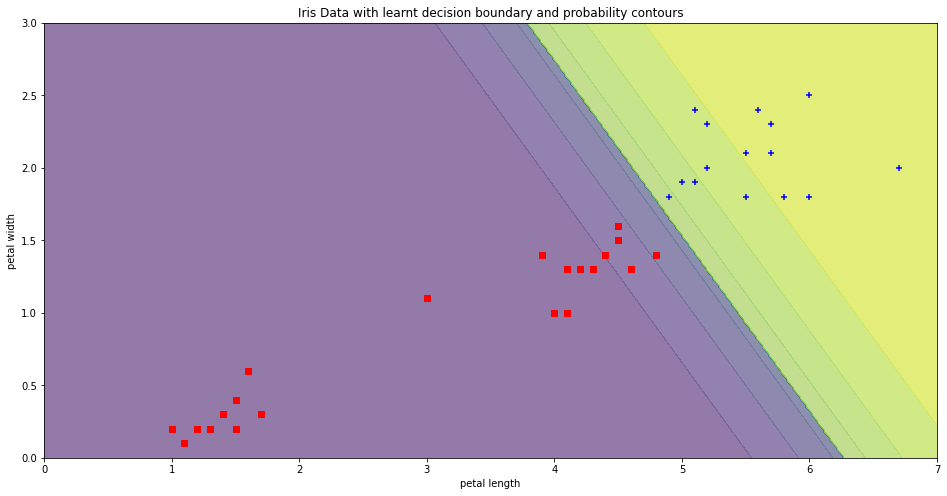

In [ ]:
plt.figure(figsize=(16,8))
plt.contourf(gridx,gridy,prob_grid,alpha=0.3)
plt.contourf(gridx,gridy,pred_grid,alpha=0.4)
for m in unique_markers: #markers cannot be a list so we plot case by case
    mask = markers == m
    plt.scatter(X_test[mask,0],X_test[mask,1],c=colors[mask],marker=m)
#plt.scatter(X_test[:,0],X_test[:,1],c=colors)
plt.title('Iris Data with learnt decision boundary and probability contours')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

The above graph visualizes the decision boundary, located at the threshold probability of 0.5, as learnt by the Logistic Regression classifier.

More detailed contour plots of the probability are also visible.

red: not virginica

square: predicted not virginica

blue: virginica

plus: predicted virginica

correct predictions are red squares and blue pluses
red plus and blue squares are incorrect.